# ML class final project part2
##  Almog Shor
## Yehudit Brickner

imports

In [1]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import time
import pickle

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

create the data set with all of the features

In [2]:
def create_df(folder, ball_type,number):

    folder_dir= os.listdir(folder)
    
    big_list=[]
    my_list=[]
    count=0
    for i in folder_dir:
        if i==ball_type:
            print(i)
            j = os.listdir(folder+"/"+i)
            for k in range(len(j)):
                try:
                    img = cv2.imread(folder+"/"+i+"/"+j[k], cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
                    
                    histogram_r, bin_edges = np.histogram(img[:, :, 0], bins=256, range=(0, 256)) 
                    histogram_g, bin_edges = np.histogram(img[:, :, 1], bins=256, range=(0, 256)) 
                    histogram_b, bin_edges = np.histogram(img[:, :, 2], bins=256, range=(0, 256)) 
                    
                    dst = cv2.Canny(img, 50, 200, None, 3)
                    dst1 = cv2.Canny(img, 50, 200, None, 3)
                    lines = cv2.HoughLines(dst1, 1, np.pi / 180, 50, None, 0, 0)
                    
                    gray = cv2.imread(folder+"/"+i+"/"+j[k],cv2.IMREAD_GRAYSCALE)
                    gray =  cv2.resize(gray,(200,200), interpolation = cv2.INTER_AREA)
                    gray = cv2.medianBlur(gray, 5)
                    rows = gray.shape[0]
                    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                                    param1=100, param2=30,
                                    minRadius=10, maxRadius=100)
                    
                    my_list=[]
                    my_list.append(folder+"/"+i+"/"+j[k])
                    my_list.append(i)
                    my_list.append(number)
                    if lines is None:
                        my_list.append(0)
                        my_list.append(0)   
                    else:
                        my_list.append(1)
                        my_list.append(len(lines))
                    if circles is None:
                        my_list.append(0)
                        my_list.append(0)   
                    else:
                        my_list.append(1)
                        my_list.append(circles.shape[1])
                    
                    my_list.extend(histogram_r)
                    my_list.extend(histogram_g)
                    my_list.extend(histogram_b)
                    my_list.extend(img.flatten())
                    my_list.extend(dst.flatten())

                    big_list.append(my_list)
                    count+=1
                    
                except:
                    print("there was an error with count ",count)

    
    print("creating df")
    cols = ['path','class_name','class_number','lines?','#lines','circles?','#circles']
    for h in range(256):
        cols.append("r"+str(h))
    for h in range(256):
        cols.append("g"+str(h))
    for h in range(256):
        cols.append("b"+str(h))
    for h in range(200*200*3):
        cols.append("i"+str(h))
    for h in range(200*200):
        cols.append("e"+str(h))

    df = pd.DataFrame(big_list, columns = cols) 
              
    return df


def create_df1(folder):

    folder_dir= os.listdir(folder)
    
    big_list=[]
    my_list=[]
    count=0
    c=0
    for i in folder_dir:
        print(i)
        j = os.listdir(folder+"/"+i)
        for k in range(len(j)):
            try:
                img = cv2.imread(folder+"/"+i+"/"+j[k], cv2.COLOR_BGR2RGB)
                img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
                
                # histogram_r, bin_edges = np.histogram(img[:, :, 0], bins=256, range=(0, 256)) 
                # histogram_g, bin_edges = np.histogram(img[:, :, 1], bins=256, range=(0, 256)) 
                # histogram_b, bin_edges = np.histogram(img[:, :, 2], bins=256, range=(0, 256)) 
                
                dst = cv2.Canny(img, 50, 200, None, 3)
                # dst1 = cv2.Canny(img, 50, 200, None, 3)
                # lines = cv2.HoughLines(dst1, 1, np.pi / 180, 50, None, 0, 0)
                
                # gray = cv2.imread(folder+"/"+i+"/"+j[k],cv2.IMREAD_GRAYSCALE)
                # gray =  cv2.resize(gray,(200,200), interpolation = cv2.INTER_AREA)
                # gray = cv2.medianBlur(gray, 5)
                # rows = gray.shape[0]
                # circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                #                 param1=100, param2=30,
                #                 minRadius=10, maxRadius=100)
                
                my_list=[]
                my_list.append(folder+"/"+i+"/"+j[k])
                my_list.append(i)
                my_list.append(c)
                # if lines is None:
                #     my_list.append(0)
                #     my_list.append(0)   
                # else:
                #     my_list.append(1)
                #     my_list.append(len(lines))
                # if circles is None:
                #     my_list.append(0)
                #     my_list.append(0)   
                # else:
                #     my_list.append(1)
                #     my_list.append(circles.shape[1])
                
                # my_list.extend(histogram_r)
                # my_list.extend(histogram_g)
                # my_list.extend(histogram_b)
                # my_list.extend(img.flatten())
                my_list.extend(dst.flatten())

                big_list.append(my_list)
                count+=1
                
            except:
                print("there was an error with count ",count)

        c+=1

    
    print("creating df")
    # cols = ['path','class_name','class_number','lines?','#lines','circles?','#circles']
    cols = ['path','class_name','class_number']
    # for h in range(256):
    #     cols.append("r"+str(h))
    # for h in range(256):
    #     cols.append("g"+str(h))
    # for h in range(256):
    #     cols.append("b"+str(h))
    # for h in range(200*200*3):
    #     cols.append("i"+str(h))
    for h in range(200*200):
        cols.append("e"+str(h))

    df = pd.DataFrame(big_list, columns = cols) 

    print("created df")
              
    return df

In [3]:
# folder ="C:/Users/nechd/Downloads/ball_classification/train"
# start_time = time.time()
# full_ball_edge_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [4]:
# full_ball_edge_df.shape
# full_ball_edge_df.head()

In [5]:
# full_ball_edge_df.to_csv('edge.csv', index=False)

In [6]:
# folder ="C:/Users/nechd/Downloads/ball_classification/test"
# start_time = time.time()
# full_test_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [7]:
# full_test_df.to_csv('final_test_data_edge.csv', index=False)

import the data with some/all features

In [2]:
edge = pd.read_csv('edge.csv')
del edge['path']
del edge['class_name']
ball_type = [0,2,9,11]
edge_4balls = edge.loc[edge['class_number'].isin(ball_type)]
edge_4balls.shape

(1543, 40001)

In [3]:
test_data2 = pd.read_csv('final_test_data_edge.csv')
del test_data2['path']
del test_data2['class_name']
ball_type = [0,2,9,11]
test_data2 = test_data2.loc[test_data2['class_number'].isin(ball_type)]
test_data2.shape

(388, 40001)

In [4]:
X = edge_4balls.drop(['class_number'], axis=1)
y = edge_4balls['class_number']

final_test_X = test_data2.drop(['class_number'], axis=1)
final_test_y = test_data2['class_number']

train test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
pca1=PCA(n_components=100)
X_train5=pca1.fit_transform(X_train)
X_test5=pca1.transform(X_test)
final_test_X5=pca1.transform(final_test_X)
y_train5 = y_train
y_test5 = y_test

print(X_train5.shape)
print(X_test5.shape)
print(final_test_X5.shape)


(1080, 100)
(463, 100)
(388, 100)


In [7]:
cs = [i for i in range(100)]
df_X5_final_test = pd.DataFrame(final_test_X5,columns=cs)
cy =[]
for i in final_test_y:
    cy.append(i)
df_X5_final_test['class_number']=cy
df_X5_final_test.to_csv('df_X5_final_test.csv', index=False)

extra functions

In [14]:
# function to represent the confusion matrix nicely
def Confusion_Matrix(cf_matrix):
    plt.figure(figsize=(6,6))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [15]:
# list to hold all final results
results=[]

model imports

In [16]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression



# RUN ON DATA SET WITH EDGES PCA 100

#### SVM

In [17]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train5, y_train5)
            pred_svm = svm.predict(X_test5)
            print(i,j,round(np.sum([y_test5==pred_svm])/len(y_test5),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train5, y_train5)
            pred_svm = svm.predict(X_test5)
            print(i,j,round(np.sum([y_test5==pred_svm])/len(y_test5),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train5, y_train5)
            pred_svm = svm.predict(X_test5)
            print(i,j,round(np.sum([y_test5==pred_svm])/len(y_test5),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 42.33 %
squared_hinge l2 42.33 %
OutputCodeClassifier
hinge l2 38.23 %
squared_hinge l2 44.71 %
OneVsRestClassifier
hinge l2 30.45 %
squared_hinge l2 30.45 %


              precision    recall  f1-score   support

           0       0.34      0.26      0.29       112
           2       0.44      0.45      0.44       106
           9       0.37      0.36      0.36       106
          11       0.40      0.47      0.44       139

    accuracy                           0.39       463
   macro avg       0.39      0.39      0.38       463
weighted avg       0.39      0.39      0.39       463

39.09 %


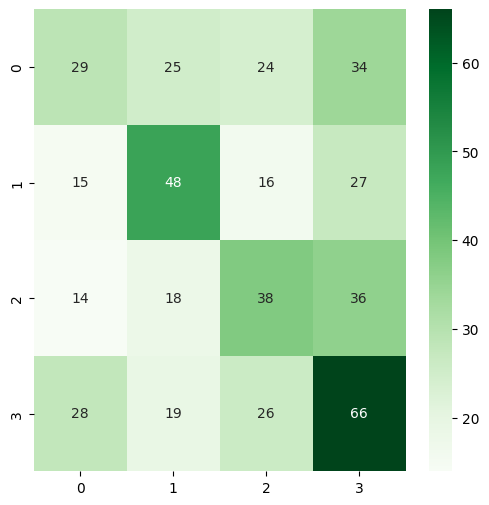

In [18]:
svm5 =  OutputCodeClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train5, y_train5)
pred_svm5 = svm5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_svm5))
print(classification_report(y_test5, pred_svm5))
print(round(np.sum([y_test5==pred_svm5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 100', 'SVM',round(np.sum([y_test5==pred_svm5])/len(y_test5),4)*100 ])

#### KNN

In [19]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train5,y_train5)
    pred_knn = neigh.predict(X_test5)
    print(i,round(np.sum([y_test5==pred_knn])/len(y_test5),4)*100,"%")

1 57.45 %
2 51.4 %
3 53.559999999999995 %
4 50.32 %
5 50.970000000000006 %
6 49.03 %
7 48.809999999999995 %
8 47.08 %
9 48.809999999999995 %
10 47.52 %
11 47.3 %
12 46.44 %
13 48.6 %
14 46.650000000000006 %
15 47.52 %
16 47.3 %
17 48.38 %
18 47.52 %
19 48.16 %
20 48.6 %
21 47.949999999999996 %
22 47.73 %
23 47.52 %
24 47.949999999999996 %
25 47.949999999999996 %
26 47.73 %
27 48.38 %
28 48.809999999999995 %
29 49.03 %
30 47.08 %
31 47.73 %
32 48.16 %
33 46.44 %
34 46.87 %
35 47.3 %
36 47.08 %
37 47.08 %
38 46.22 %
39 46.44 %
40 46.0 %
41 46.650000000000006 %
42 46.87 %
43 46.87 %
44 46.87 %
45 46.22 %
46 46.44 %
47 47.3 %
48 46.44 %
49 46.22 %
50 47.08 %


              precision    recall  f1-score   support

           0       0.58      0.51      0.54       112
           2       0.60      0.50      0.54       106
           9       0.46      0.59      0.52       106
          11       0.66      0.67      0.67       139

    accuracy                           0.57       463
   macro avg       0.58      0.57      0.57       463
weighted avg       0.58      0.57      0.58       463

57.45 %


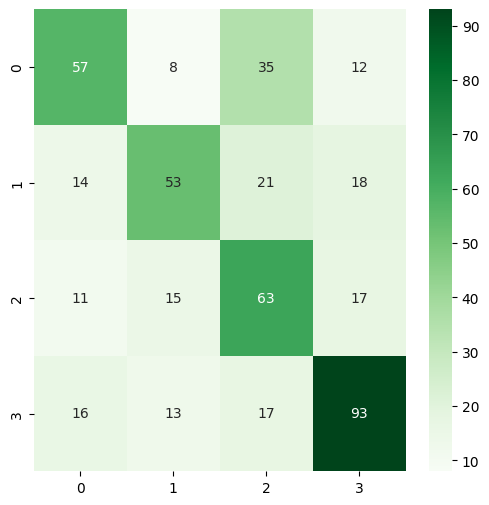

In [20]:
neigh5 = KNeighborsClassifier(n_neighbors=1)
neigh5.fit(X_train5,y_train5)
pred_knn5 = neigh5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_knn5))
print(classification_report(y_test5, pred_knn5))
print(round(np.sum([y_test5==pred_knn5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 100', 'KNN',round(np.sum([y_test5==pred_knn5])/len(y_test5),4)*100 ])

#### Adaboost

In [21]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train5,y_train5)
    pred_ada = ada.predict(X_test5)
    print(i,round(np.sum([y_test5==pred_ada])/len(y_test5),4)*100,"%")

50 42.55 %
100 43.2 %
150 41.25 %
200 42.980000000000004 %
250 44.28 %
300 44.06 %
350 46.22 %
400 46.44 %
450 48.38 %
500 46.44 %
550 47.3 %
600 47.3 %
650 47.52 %
700 47.3 %
750 49.89 %
800 48.38 %
850 46.650000000000006 %
900 47.3 %
950 48.809999999999995 %
1000 46.87 %
1050 46.650000000000006 %
1100 46.22 %
1150 47.73 %
1200 47.3 %
1250 47.949999999999996 %
1300 47.3 %
1350 46.650000000000006 %
1400 47.52 %
1450 46.44 %
1500 46.650000000000006 %
1550 46.650000000000006 %
1600 45.79 %
1650 45.57 %
1700 46.44 %
1750 46.22 %
1800 46.650000000000006 %
1850 46.22 %
1900 47.73 %
1950 46.44 %
2000 46.22 %


              precision    recall  f1-score   support

           0       0.38      0.47      0.42       112
           2       0.60      0.28      0.38       106
           9       0.40      0.45      0.42       106
          11       0.52      0.58      0.55       139

    accuracy                           0.46       463
   macro avg       0.48      0.45      0.44       463
weighted avg       0.48      0.46      0.45       463

45.57 %


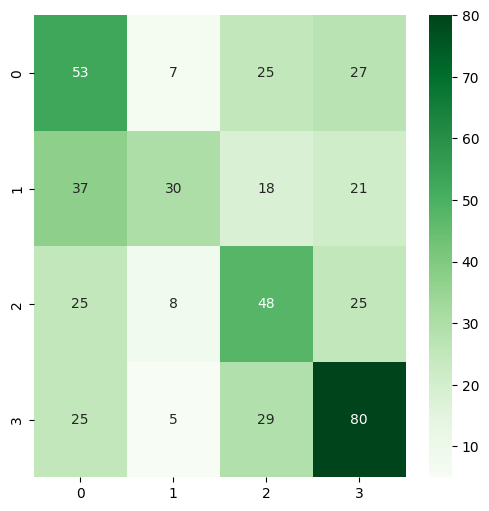

In [22]:
ada5 = AdaBoostClassifier(n_estimators=1650, algorithm="SAMME",random_state=0)
ada5.fit(X_train5,y_train5)
pred_ada5 = ada5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_ada5))
print(classification_report(y_test5, pred_ada5))
print(round(np.sum([y_test5==pred_ada5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 100', 'Adaboost',round(np.sum([y_test5==pred_ada5])/len(y_test5),4)*100 ])

#### Random Forest

In [23]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train5,y_train5)
        pred_RF = RF.predict(X_test5)
        print(i,j,round(np.sum([y_test5==pred_RF])/len(y_test5),4)*100,"%")

40 2 57.24 %
40 3 52.27 %
40 4 50.970000000000006 %
60 2 55.08 %
60 3 54.64 %
60 4 53.559999999999995 %
80 2 55.510000000000005 %
80 3 55.720000000000006 %
80 4 55.510000000000005 %
100 2 54.21 %
100 3 55.28999999999999 %
100 4 54.86 %
120 2 54.86 %
120 3 55.94 %
120 4 55.08 %
140 2 54.64 %
140 3 55.94 %
140 4 55.28999999999999 %
160 2 53.779999999999994 %
160 3 54.86 %
160 4 55.510000000000005 %
180 2 54.43 %
180 3 55.94 %
180 4 54.86 %
200 2 53.559999999999995 %
200 3 56.37 %
200 4 55.08 %
220 2 54.21 %
220 3 57.45 %
220 4 55.510000000000005 %
240 2 54.0 %
240 3 57.879999999999995 %
240 4 55.720000000000006 %
260 2 54.0 %
260 3 57.02 %
260 4 55.28999999999999 %
280 2 54.0 %
280 3 57.45 %
280 4 55.08 %
300 2 55.08 %
300 3 57.45 %
300 4 55.510000000000005 %
320 2 54.86 %
320 3 57.45 %
320 4 56.16 %
340 2 54.64 %
340 3 57.45 %
340 4 55.08 %
360 2 54.64 %
360 3 56.16 %
360 4 54.86 %
380 2 55.08 %
380 3 55.720000000000006 %
380 4 55.28999999999999 %
400 2 55.28999999999999 %
400 3 55.08 %

              precision    recall  f1-score   support

           0       0.51      0.42      0.46       112
           2       0.82      0.40      0.54       106
           9       0.51      0.56      0.53       106
          11       0.53      0.78      0.64       139

    accuracy                           0.56       463
   macro avg       0.59      0.54      0.54       463
weighted avg       0.59      0.56      0.55       463

55.510000000000005 %


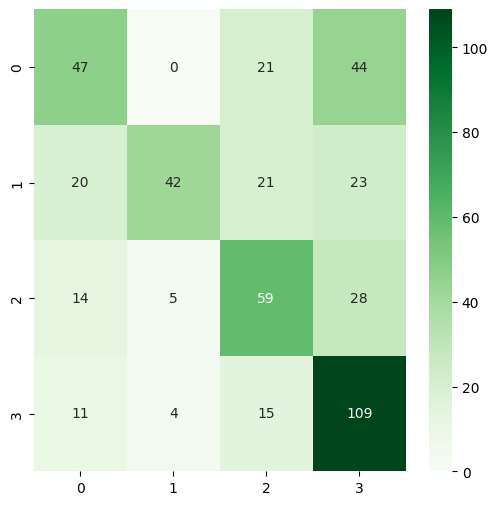

In [24]:
RF5 = RandomForestClassifier(n_estimators=80, max_depth=None,min_samples_split=2, random_state=0)
RF5.fit(X_train5,y_train5)
pred_RF5 = RF5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_RF5))
print(classification_report(y_test5, pred_RF5))
print(round(np.sum([y_test5==pred_RF5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 100', 'Random Forest',round(np.sum([y_test5==pred_RF5])/len(y_test5),4)*100 ])

#### Logistic Regression

In [25]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train5,y_train5)
                pred_LR = LR.predict(X_test5)
                print(i,j,k,round(np.sum([y_test5==pred_LR])/len(y_test5),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 48.6 %
l1 liblinear 0.01 48.16 %
l1 liblinear 0.001 47.73 %
l1 saga 0.1 48.16 %


l1 saga 0.01 47.08 %
l1 saga 0.001 46.87 %
l2 lbfgs 0.1 46.87 %
l2 lbfgs 0.01 46.87 %
l2 lbfgs 0.001 46.87 %
l2 liblinear 0.1 46.650000000000006 %
l2 liblinear 0.01 43.84 %
l2 liblinear 0.001 47.73 %
l2 newton-cg 0.1 47.08 %
l2 newton-cg 0.01 47.08 %
l2 newton-cg 0.001 47.08 %
l2 sag 0.1 46.650000000000006 %
l2 sag 0.01 47.08 %
l2 sag 0.001 46.87 %
l2 saga 0.1 48.16 %
l2 saga 0.01 47.08 %
l2 saga 0.001 46.87 %


              precision    recall  f1-score   support

           0       0.55      0.37      0.44       112
           2       0.42      0.47      0.44       106
           9       0.41      0.46      0.44       106
          11       0.55      0.60      0.57       139

    accuracy                           0.48       463
   macro avg       0.48      0.47      0.47       463
weighted avg       0.49      0.48      0.48       463

48.16 %


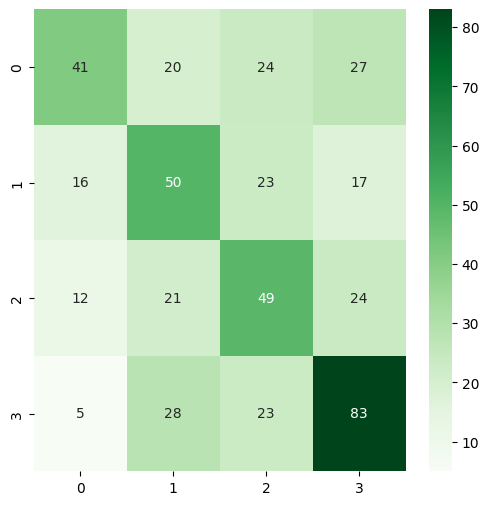

In [26]:
LR5 = LogisticRegression(penalty="l1", solver="saga", tol=0.1, max_iter=10000, random_state=0)
LR5.fit(X_train5,y_train5)
pred_LR5 = LR5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_LR5))
print(classification_report(y_test5, pred_LR5))
print(round(np.sum([y_test5==pred_LR5])/len(y_test5),4)*100,"%")
results.append(['edges PCA 100', 'Logistic Regression',round(np.sum([y_test5==pred_LR5])/len(y_test5),4)*100 ])

# RUN ON DATA SET WITH EDGES PCA 400

In [8]:
pca2=PCA(n_components=400)
X_train8=pca2.fit_transform(X_train)
X_test8=pca2.transform(X_test)
final_test_X8 = pca2.transform(final_test_X)
y_train8 = y_train
y_test8 = y_test

print(X_train8.shape)
print(X_test8.shape)
print(final_test_X8.shape)

(1080, 400)
(463, 400)
(388, 400)


In [9]:
cs = [i for i in range(400)]
df_X8_final_test = pd.DataFrame(final_test_X8,columns=cs)
cy =[]
for i in final_test_y:
    cy.append(i)
df_X8_final_test['class_number']=cy
df_X8_final_test.to_csv('df_X8_final_test.csv', index=False)

#### SVM

In [29]:
losses = ["hinge","squared_hinge"]
penalties = ["l1","l2"]

print("OneVsOneClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train8, y_train8)
            pred_svm = svm.predict(X_test8)
            print(i,j,round(np.sum([y_test8==pred_svm])/len(y_test8),4)*100,"%")
        except:
            pass

print("OutputCodeClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OutputCodeClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train8, y_train8)
            pred_svm = svm.predict(X_test8)
            print(i,j,round(np.sum([y_test8==pred_svm])/len(y_test8),4)*100,"%")
        except:
            pass


print("OneVsRestClassifier")
for i in losses:
    for j in penalties:
        try:
            svm =  OneVsRestClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train8, y_train8)
            pred_svm = svm.predict(X_test8)
            print(i,j,round(np.sum([y_test8==pred_svm])/len(y_test8),4)*100,"%")
        except:
            pass

OneVsOneClassifier
hinge l2 51.4 %
squared_hinge l2 51.4 %
OutputCodeClassifier
hinge l2 39.09 %
squared_hinge l2 45.14 %
OneVsRestClassifier
hinge l2 46.0 %
squared_hinge l2 46.0 %


              precision    recall  f1-score   support

           0       0.43      0.41      0.42       112
           2       0.54      0.54      0.54       106
           9       0.48      0.55      0.51       106
          11       0.59      0.55      0.57       139

    accuracy                           0.51       463
   macro avg       0.51      0.51      0.51       463
weighted avg       0.52      0.51      0.51       463

51.4 %


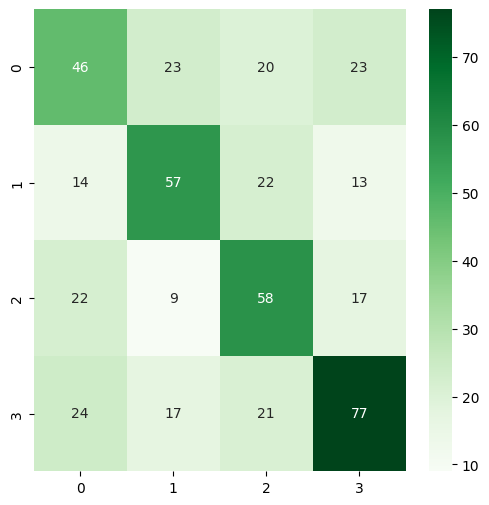

In [30]:
svm8 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train8, y_train8)
pred_svm8 = svm8.predict(X_test8)
Confusion_Matrix(confusion_matrix(y_test8,pred_svm8))
print(classification_report(y_test8, pred_svm8))
print(round(np.sum([y_test8==pred_svm8])/len(y_test8),4)*100,"%")
results.append(['edges PCA 400', 'SVM',round(np.sum([y_test8==pred_svm8])/len(y_test8),4)*100 ])

#### KNN

In [31]:
for i in range(1,51):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train8,y_train8)
    pred_knn = neigh.predict(X_test8)
    print(i,round(np.sum([y_test8==pred_knn])/len(y_test8),4)*100,"%")

1 47.73 %
2 42.76 %
3 38.879999999999995 %
4 41.9 %
5 40.6 %
6 40.17 %
7 39.739999999999995 %
8 39.739999999999995 %
9 40.39 %
10 39.739999999999995 %
11 38.66 %
12 38.66 %
13 40.39 %
14 38.440000000000005 %
15 39.519999999999996 %
16 36.720000000000006 %
17 35.64 %
18 36.93 %
19 37.15 %
20 38.01 %
21 37.580000000000005 %
22 39.739999999999995 %
23 38.879999999999995 %
24 39.31 %
25 37.37 %
26 36.5 %
27 35.42 %
28 35.85 %
29 35.42 %
30 35.21 %
31 35.85 %
32 35.42 %
33 35.42 %
34 35.85 %
35 35.21 %
36 35.42 %
37 34.56 %
38 35.21 %
39 34.77 %
40 35.42 %
41 33.910000000000004 %
42 34.56 %
43 34.339999999999996 %
44 34.56 %
45 34.56 %
46 34.56 %
47 33.26 %
48 33.48 %
49 33.48 %
50 33.48 %


              precision    recall  f1-score   support

           0       0.50      0.46      0.48       112
           2       0.40      0.20      0.26       106
           9       0.40      0.58      0.48       106
          11       0.57      0.62      0.60       139

    accuracy                           0.48       463
   macro avg       0.47      0.47      0.45       463
weighted avg       0.47      0.48      0.46       463

47.73 %


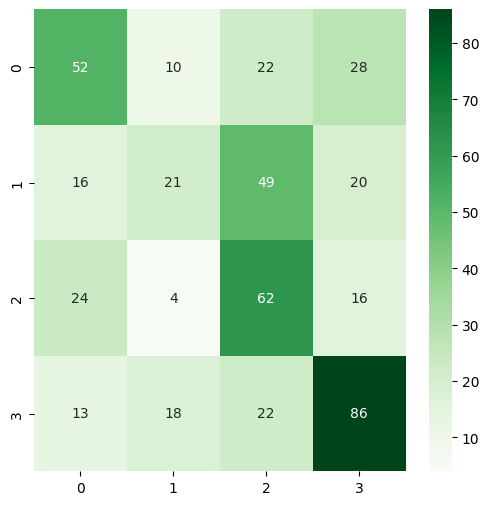

In [32]:
neigh8 = KNeighborsClassifier(n_neighbors=1)
neigh8.fit(X_train8,y_train8)
pred_knn8 = neigh8.predict(X_test8)
Confusion_Matrix(confusion_matrix(y_test8,pred_knn8))
print(classification_report(y_test8, pred_knn8))
print(round(np.sum([y_test8==pred_knn8])/len(y_test8),4)*100,"%")
results.append(['edges PCA 400', 'KNN',round(np.sum([y_test8==pred_knn8])/len(y_test8),4)*100 ])

#### Adaboost

In [33]:
for i in range(50,2001,50):
    ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
    ada.fit(X_train8,y_train8)
    pred_ada = ada.predict(X_test8)
    print(i,round(np.sum([y_test8==pred_ada])/len(y_test8),4)*100,"%")

50 41.04 %
100 40.17 %
150 38.879999999999995 %
200 39.739999999999995 %
250 42.120000000000005 %
300 41.68 %
350 42.120000000000005 %
400 41.04 %
450 43.2 %
500 41.47 %
550 40.39 %
600 41.9 %
650 42.980000000000004 %
700 41.68 %
750 41.47 %
800 42.120000000000005 %
850 43.63 %
900 43.41 %
950 44.06 %
1000 42.980000000000004 %
1050 42.55 %
1100 43.41 %
1150 43.2 %
1200 42.76 %
1250 42.980000000000004 %
1300 42.980000000000004 %
1350 42.120000000000005 %
1400 43.2 %
1450 44.49 %
1500 43.84 %
1550 45.14 %
1600 44.06 %
1650 44.92 %
1700 44.49 %
1750 44.06 %
1800 44.06 %
1850 44.71 %
1900 44.06 %
1950 43.63 %
2000 43.63 %


              precision    recall  f1-score   support

           0       0.34      0.38      0.36       112
           2       0.85      0.16      0.27       106
           9       0.37      0.56      0.45       106
          11       0.50      0.58      0.54       139

    accuracy                           0.43       463
   macro avg       0.52      0.42      0.40       463
weighted avg       0.51      0.43      0.41       463

42.980000000000004 %


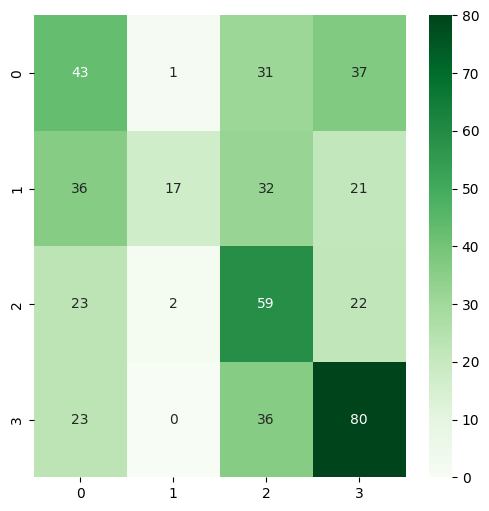

In [34]:
ada8 = AdaBoostClassifier(n_estimators=1250, algorithm="SAMME",random_state=0)
ada8.fit(X_train8,y_train8)
pred_ada8 = ada8.predict(X_test8)
Confusion_Matrix(confusion_matrix(y_test8,pred_ada8))
print(classification_report(y_test8, pred_ada8))
print(round(np.sum([y_test8==pred_ada8])/len(y_test8),4)*100,"%")
results.append(['edges PCA 400', 'Adaboost',round(np.sum([y_test8==pred_ada8])/len(y_test8),4)*100 ])

#### Random Forest

In [35]:
for i in range(40,501,20):
    for j in range(2,5):
        RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
        RF.fit(X_train8,y_train8)
        pred_RF = RF.predict(X_test8)
        print(i,j,round(np.sum([y_test8==pred_RF])/len(y_test8),4)*100,"%")

40 2 49.03 %
40 3 47.3 %
40 4 47.73 %
60 2 49.89 %
60 3 47.949999999999996 %
60 4 46.87 %
80 2 50.32 %
80 3 47.73 %
80 4 46.44 %
100 2 50.970000000000006 %
100 3 48.809999999999995 %
100 4 46.650000000000006 %
120 2 51.190000000000005 %
120 3 48.16 %
120 4 46.22 %
140 2 51.4 %
140 3 49.24 %
140 4 47.3 %
160 2 50.54 %
160 3 48.809999999999995 %
160 4 47.08 %
180 2 48.6 %
180 3 49.46 %
180 4 48.6 %
200 2 49.89 %
200 3 50.11 %
200 4 47.73 %
220 2 49.68 %
220 3 50.32 %
220 4 47.949999999999996 %
240 2 49.46 %
240 3 49.46 %
240 4 48.6 %
260 2 50.32 %
260 3 49.46 %
260 4 48.16 %
280 2 50.11 %
280 3 49.24 %
280 4 48.38 %
300 2 50.54 %
300 3 49.03 %
300 4 48.16 %
320 2 49.46 %
320 3 48.809999999999995 %
320 4 47.3 %
340 2 50.32 %
340 3 49.68 %
340 4 47.73 %
360 2 49.89 %
360 3 49.46 %
360 4 47.08 %
380 2 50.11 %
380 3 49.68 %
380 4 47.3 %
400 2 50.11 %
400 3 49.68 %
400 4 47.08 %
420 2 51.190000000000005 %
420 3 49.24 %
420 4 46.44 %
440 2 50.970000000000006 %
440 3 49.89 %
440 4 47.3 %
460 2 

              precision    recall  f1-score   support

           0       0.62      0.23      0.34       112
           2       1.00      0.19      0.32       106
           9       0.39      0.65      0.48       106
          11       0.50      0.79      0.61       139

    accuracy                           0.49       463
   macro avg       0.63      0.47      0.44       463
weighted avg       0.62      0.49      0.45       463

48.6 %


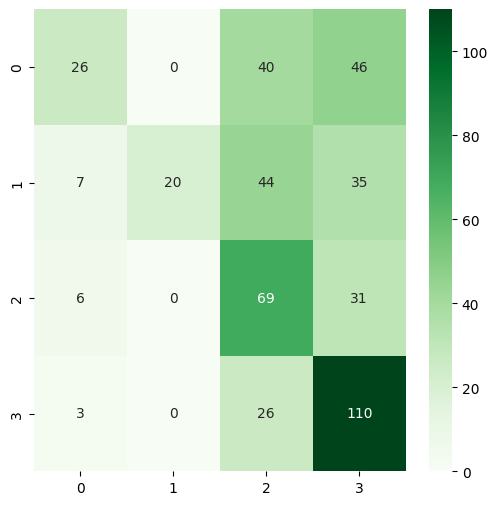

In [36]:
RF8 = RandomForestClassifier(n_estimators=240, max_depth=None,min_samples_split=4, random_state=0)
RF8.fit(X_train8,y_train8)
pred_RF8 = RF8.predict(X_test8)
Confusion_Matrix(confusion_matrix(y_test8,pred_RF8))
print(classification_report(y_test8, pred_RF8))
print(round(np.sum([y_test8==pred_RF8])/len(y_test8),4)*100,"%")
results.append(['edges PCA 400', 'Random Forest',round(np.sum([y_test8==pred_RF8])/len(y_test8),4)*100 ])

#### Logistic Regression

In [37]:
penilties = ["l1","l2","elasticnet"]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
tols= [0.1 ,0.01, 0.001]

for i in penilties:
    for j in solvers:
        for k in tols:
            try:
                LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
                LR.fit(X_train8,y_train8)
                pred_LR = LR.predict(X_test8)
                print(i,j,k,round(np.sum([y_test8==pred_LR])/len(y_test8),4)*100,"%")
            except:
                pass
        

l1 liblinear 0.1 50.970000000000006 %
l1 liblinear 0.01 48.6 %
l1 liblinear 0.001 46.87 %
l1 saga 0.1 50.760000000000005 %
l1 saga 0.01 50.760000000000005 %
l1 saga 0.001 50.970000000000006 %
l2 lbfgs 0.1 49.89 %
l2 lbfgs 0.01 49.03 %
l2 lbfgs 0.001 49.46 %
l2 liblinear 0.1 50.760000000000005 %
l2 liblinear 0.01 48.38 %
l2 liblinear 0.001 51.62 %
l2 newton-cg 0.1 49.03 %
l2 newton-cg 0.01 49.24 %
l2 newton-cg 0.001 49.24 %
l2 sag 0.1 50.11 %
l2 sag 0.01 51.190000000000005 %
l2 sag 0.001 49.89 %
l2 saga 0.1 50.760000000000005 %
l2 saga 0.01 50.760000000000005 %
l2 saga 0.001 50.970000000000006 %


              precision    recall  f1-score   support

           0       0.45      0.40      0.42       112
           2       0.53      0.51      0.52       106
           9       0.44      0.49      0.46       106
          11       0.59      0.61      0.60       139

    accuracy                           0.51       463
   macro avg       0.50      0.50      0.50       463
weighted avg       0.51      0.51      0.51       463

50.970000000000006 %


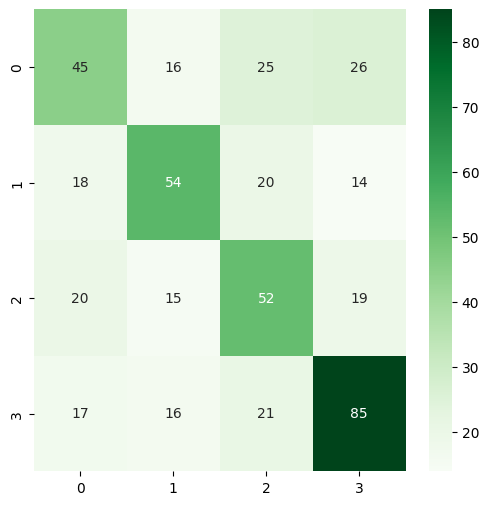

In [38]:
LR8 = LogisticRegression(penalty="l1", solver="saga", tol=0.001, max_iter=10000, random_state=0)
LR8.fit(X_train8,y_train8)
pred_LR8 = LR8.predict(X_test8)
Confusion_Matrix(confusion_matrix(y_test8,pred_LR8))
print(classification_report(y_test8, pred_LR8))
print(round(np.sum([y_test8==pred_LR8])/len(y_test8),4)*100,"%")
results.append(['edges PCA 400', 'Logistic Regression',round(np.sum([y_test8==pred_LR8])/len(y_test8),4)*100 ])

In [39]:
cols = ["df_type","classifier","accuracy"]
df = pd.DataFrame(results, columns=cols)

In [40]:
df

,df_type,classifier,accuracy
0,edges PCA 100,SVM,39.09
1,edges PCA 100,KNN,57.45
2,edges PCA 100,Adaboost,45.57
3,edges PCA 100,Random Forest,55.51
4,edges PCA 100,Logistic Regression,48.16
5,edges PCA 400,SVM,51.40
6,edges PCA 400,KNN,47.73
7,edges PCA 400,Adaboost,42.98
8,edges PCA 400,Random Forest,48.60
9,edges PCA 400,Logistic Regression,50.97


In [41]:
import pickle
filenames = ['svm5.sav','knn5.sav','ada5.sav','RF5.sav','LR5.sav','svm8.sav','knn8.sav','ada8.sav','RF8.sav','LR8.sav']
models= [svm5,neigh5,ada5,RF5,LR5,svm8,neigh8,ada8,RF8,LR8]

for i in range(len(filenames)): 
    pickle.dump(models[i], open(filenames[i], 'wb'))